In [1]:
import numpy as np

# X : Nxd matrix
# w : dx1 vector
# y : Nx1 vector

def sigmoid(S):
  return 1/(1 + np.exp(-S))

def caculate_Z(w, X):
  return sigmoid(X.dot(w))

def loss(w, X, y, lam):
  Z = caculate_Z(w, X)
  return -np.mean(y*np.log(Z) + (1-y)*np.log(1-Z)) + 0.5*lam/X.shape[0]*np.sum(w*w)

def SGD_fit(w_init, X, y, lr_rate, lam, n_epochs):
  ep = 0
  N, d = X.shape[0], X.shape[1]
  w = w_old = w_init
  while ep < n_epochs:
    ep  += 1
    mix_ids = np.random.permutation(N)
    for i in mix_ids:
      x_i = X[i]
      y_i = y[i]
      z_i = caculate_Z(w, x_i)
      w = w - lr_rate * ((z_i - y_i)* x_i + lam*w)
    if np.linalg.norm(w - w_old)/d < 1e-6:
      break
    w_old = w
    print('Epoch:', ep, 'loss = ', loss(w, X, y, lam))
  return w

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
# bias trick
N = X.shape[0]
Xbar = np.concatenate((X, np.ones((N, 1))), axis = 1)
print(y.shape)

(20,)


In [2]:
w_init = np.random.rand(Xbar.shape[1])
w = SGD_fit(w_init, Xbar, y, lr_rate=0.005, lam=0.0001, n_epochs=1000)


Epoch: 1 loss =  0.8080569525449255
Epoch: 2 loss =  0.7805472102940152
Epoch: 3 loss =  0.7583206430678611
Epoch: 4 loss =  0.7417277529257351
Epoch: 5 loss =  0.728995453890815
Epoch: 6 loss =  0.7193852646673659
Epoch: 7 loss =  0.7118142398252729
Epoch: 8 loss =  0.70588448252187
Epoch: 9 loss =  0.7011336503790788
Epoch: 10 loss =  0.6972955262845547
Epoch: 11 loss =  0.6940261029976679
Epoch: 12 loss =  0.6910654733512135
Epoch: 13 loss =  0.6884166550807196
Epoch: 14 loss =  0.6858502890891357
Epoch: 15 loss =  0.6834509684276162
Epoch: 16 loss =  0.6810688497154782
Epoch: 17 loss =  0.6787375303194192
Epoch: 18 loss =  0.6764791017106979
Epoch: 19 loss =  0.6742430630849675
Epoch: 20 loss =  0.6719856446072913
Epoch: 21 loss =  0.6697761898155044
Epoch: 22 loss =  0.6675569301509476
Epoch: 23 loss =  0.6654013345147658
Epoch: 24 loss =  0.663283690380406
Epoch: 25 loss =  0.6611339203931454
Epoch: 26 loss =  0.6590324128864757
Epoch: 27 loss =  0.6569532057556801
Epoch: 28 loss

In [0]:
print(sigmoid(np.dot(Xbar, ww)))

[0.05293608 0.07227693 0.09795335 0.13145879 0.17421155 0.22723066
 0.22723066 0.29070518 0.36356867 0.44328142 0.52602603 0.6073655
 0.6831541  0.75032722 0.85376797 0.8905643  0.91898024 0.9405106
 0.95658971 0.97717445]


In [3]:
print(X.shape)
print(y.shape)
XX = X[np.where(y == 0)]
print(Xbar)
print(w)

(20, 1)
(20,)
[[0.5  1.  ]
 [0.75 1.  ]
 [1.   1.  ]
 [1.25 1.  ]
 [1.5  1.  ]
 [1.75 1.  ]
 [1.75 1.  ]
 [2.   1.  ]
 [2.25 1.  ]
 [2.5  1.  ]
 [2.75 1.  ]
 [3.   1.  ]
 [3.25 1.  ]
 [3.5  1.  ]
 [4.   1.  ]
 [4.25 1.  ]
 [4.5  1.  ]
 [4.75 1.  ]
 [5.   1.  ]
 [5.5  1.  ]]
[ 1.31571294 -3.5171605 ]


In [4]:
print(w[1])

-3.5171604957009004


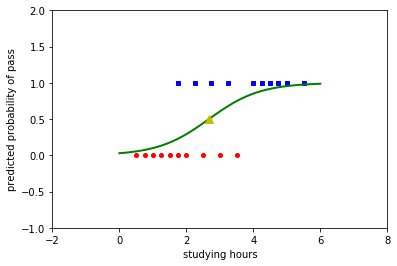

In [5]:
import matplotlib.pyplot as plt

X0 = X[np.where(y == 0)]
y0 = y[np.where(y == 0)]
X1 = X[np.where(y == 1)]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 4)
plt.plot(X1, y1, 'bs', markersize = 4)

xx = np.linspace(0, 6, 1000)
w0 = w[0]
w1 = w[1]
threshold = -w1/w0
yy = sigmoid(w1 + w0*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

In [6]:
print(threshold)

2.6731974636951725
